In [2]:
import pandas as pd

file_path = '/Users/chojungseok/Desktop/code/DAMF2/ML/data/'

red_wine = pd.read_csv(file_path+'winequality-red.csv', sep=';')
white_wine = pd.read_csv(file_path+'winequality-white.csv', sep=';')

In [3]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red_wine = red_wine[['alcohol', 'residual sugar', 'pH']]
red_wine.rename(columns={'residual sugar':'sugar'}, inplace= True)
red_wine['class'] = 0
red_wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0
1,9.8,2.6,3.20,0
2,9.8,2.3,3.26,0
3,9.8,1.9,3.16,0
4,9.4,1.9,3.51,0


In [5]:
white_wine = white_wine[['alcohol', 'residual sugar', 'pH']]
white_wine.rename(columns={'residual sugar':'sugar'}, inplace= True)
white_wine['class'] = 1
white_wine.head()

,alcohol,sugar,pH,class
0,8.8,20.7,3.00,1
1,9.5,1.6,3.30,1
2,10.1,6.9,3.26,1
3,9.9,8.5,3.19,1
4,9.9,8.5,3.19,1


In [6]:
wine = pd.concat([red_wine, white_wine])

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 253.8 KB


In [8]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [9]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine[['class']]

In [10]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target)

In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7830459770114943
0.7735384615384615


/Users/chojungseok/Desktop/code/DAMF2/ML/MLvenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=20)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9977422003284072
0.8566153846153847


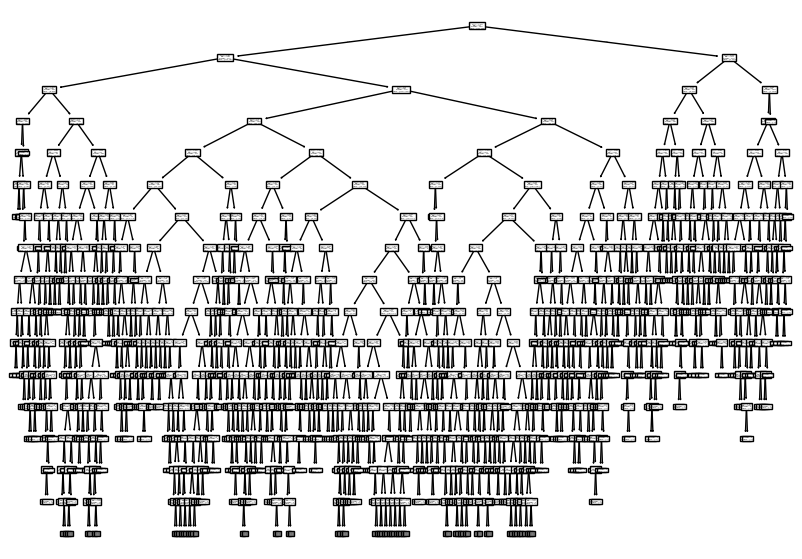

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=15)
plt.show()

#### decision tree에서는 정규화를 굳이 할 필요는 없다

불순도 : 데이터가 얼마나 편향되어있는가 / 값이 낮을수록 더 순수하다 -> 순수하다: 대부분의 데이터가 동일 클래스에 속한다  
gini 불순도가 0.5면 최악의 상황이다 / 한쪽으로 편향된 것이 최고의 상황  
부모와 자식 노드 사이의 불순도 차이를 **정보 이득**이라고 한다

### 가지치기  
max_depth: 최대깊이를 정한다